In [3]:
# import modules and libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import pandas as pd

# functions to create datasets and models
from data.data import *
from models.models import *

In [3]:
train_dataset_a = torch.load('data/train/Paderborn_FD/train_a.pt')

In [4]:
train_dataset_a

{'samples': tensor([[-0.4028, -0.6439, -0.8972,  ..., -0.0580, -0.0061,  0.0824],
         [ 0.0153, -0.0305, -0.0702,  ..., -0.0031,  0.0275, -0.0580],
         [ 0.1434,  0.0854,  0.0122,  ...,  0.1129,  0.2563,  0.2441],
         ...,
         [-0.0671, -0.0610, -0.0183,  ...,  0.1007,  0.0488,  0.0244],
         [-0.0397, -0.0427,  0.2197,  ...,  0.0183,  0.0549,  0.0397],
         [ 0.0244,  0.0519,  0.0885,  ...,  0.2350,  0.0793, -0.0641]],
        dtype=torch.float64),
 'labels': tensor([1, 1, 2,  ..., 1, 1, 1])}

In [5]:
train_dataset_a['samples'].shape

torch.Size([8184, 5120])

In [6]:
train_dataset_a['labels'].shape

torch.Size([8184])

### Paderborn Dataset and its Data
After using torch.load() to load the .pt files, the datasets is a dictionary that consists of two keys, samples and labels. Each key has a tensor of 8,184 values.

The 'samples' tensor has a torch.Size([8184, 5120]), which means that there is 8,184 samples of sensor readings data with a sequence length of 5,120.

The 'labels' tensor has a torch.Size([8184]), which means that there is 8,184 labels, each for one sample.

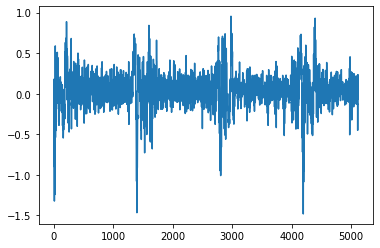

In [7]:
plt.plot(train_dataset_a['samples'][0].numpy())

In [10]:
train_dataset_a['labels'][0]

tensor(1)

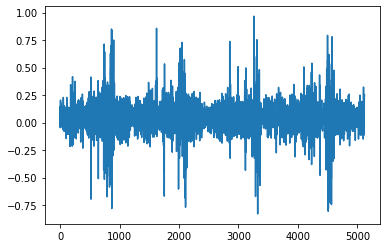

In [11]:
plt.plot(train_dataset_a['samples'][2].numpy())

In [12]:
train_dataset_a['labels'][2]

tensor(2)

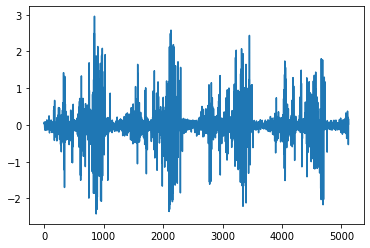

In [14]:
plt.plot(train_dataset_a['samples'][3].numpy())

In [15]:
train_dataset_a['labels'][3]

tensor(0)

The data represents a 1D sensor reading signal with a sequence length of 5,120 and its respective class (i.e., healthy, inner-bearing damage, or outer-bearing damage). In the above example, the class is 0 (healthy).

In [8]:
train_dataset_a['labels'].unique(return_counts=True)

(tensor([0, 1, 2]), tensor([ 744, 3720, 3720]))

In [9]:
def print_ds_details(name, dataset):
    print(name)
    print(f"\nThe number of samples and labels is {dataset.__len__()}.")
    print(f"The distribution of classes is {dataset.labels.unique(return_counts=True)}.\n")


### PyTorch Datasets and DataLoaders

The next step is take the samples and labels, and convert it into a Dataset class, which can be used for a DataLoader class. PyTorch Dataset and DataLoader classes make training models much easier. 

In [10]:
path = 'data/Paderborn_FD/'
source_domain = 'a'
target_domains = ['b', 'c', 'd']
batch_size = 20

In [11]:
# source domain data for training, validating and testing
train_dataloader_src, val_dataloader_src, test_dataloader_src = generate_dataloaders(path, source_domain, batch_size)

# target domain data for validating and testing
train_dataloader_tgt, val_dataloader_tgt, test_dataloader_tgt = [], [], []
for target_domain in target_domains:
    train_dataloader_temp, val_dataloader_temp, test_dataloader_temp = generate_dataloaders(path, target_domain, batch_size)
    
    train_dataloader_tgt.append(train_dataloader_temp)
    val_dataloader_tgt.append(val_dataloader_temp)
    test_dataloader_tgt.append(test_dataloader_temp)

In [12]:
print_ds_details("Train " + source_domain, train_dataloader_src.dataset)
print_ds_details("Val " + source_domain, val_dataloader_src.dataset)
print_ds_details("Test " + source_domain, test_dataloader_src.dataset)
for i in range(len(target_domains)):
    print_ds_details("Train " + target_domains[i], train_dataloader_tgt[i].dataset)
    print_ds_details("Val " + target_domains[i], val_dataloader_tgt[i].dataset)
    print_ds_details("Test " + target_domains[i], test_dataloader_tgt[i].dataset)

Train a

The number of samples and labels is 8184.
The distribution of classes is (tensor([0, 1, 2]), tensor([ 744, 3720, 3720])).

Val a

The number of samples and labels is 2728.
The distribution of classes is (tensor([0, 1, 2]), tensor([ 248, 1240, 1240])).

Test a

The number of samples and labels is 2728.
The distribution of classes is (tensor([0, 1, 2]), tensor([ 248, 1240, 1240])).

Train b

The number of samples and labels is 8184.
The distribution of classes is (tensor([0, 1, 2]), tensor([ 744, 3720, 3720])).

Val b

The number of samples and labels is 2728.
The distribution of classes is (tensor([0, 1, 2]), tensor([ 248, 1240, 1240])).

Test b

The number of samples and labels is 2728.
The distribution of classes is (tensor([0, 1, 2]), tensor([ 248, 1240, 1240])).

Train c

The number of samples and labels is 8184.
The distribution of classes is (tensor([0, 1, 2]), tensor([ 744, 3720, 3720])).

Val c

The number of samples and labels is 2728.
The distribution of classes is (t

<AxesSubplot:>

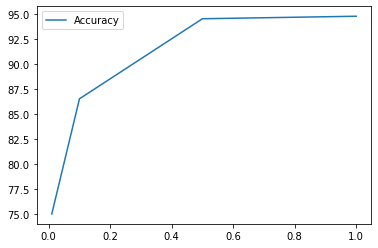

In [6]:
df1 = pd.DataFrame({
    'Accuracy': [75, 86.5, 94.5, 94.75]
}, index=[0.01, 0.1, 0.5, 1.0])
df1.plot.line()